In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ferrosim import Ferro2DSim
# import torch
import joblib
from joblib import Parallel, delayed, parallel_backend
import time
np.random.seed(512)
import pandas as pd
# from sklearn.model_selection import train_test_split
from scipy.stats import halfnorm, norm
import pickle

import gpax
import jax.numpy as jnp
gpax.utils.enable_x64()
import jax

/nfs/home/svalleti/anaconda3/envs/ferrosim/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = np.load('dataset.npy')   # 7,500 electric fields, the generation of these will be discussed below
curls = np.load('curls.npy')   # Polarization matrices at the end of FerroSIM simulations for the electric fields downloaded
defects = np.load('defect_list_seed.npy')   # Defects used in ferroSIM simulations
defect_list = list(defects)

t_vec_dummy = np.linspace(0,4,1200)
t_vec = t_vec_dummy[0:900]  #Time used in rvae  
t_vec_ext = t_vec_dummy[0:950]    #Time used in ferrosim

np.random.seed(521)
dummy = np.random.choice(np.arange(len(dataset)), size = 1000, replace = False)
X0 = np.copy(dataset)[dummy]
y0_abs = np.copy(curls)[dummy]

In [9]:
with open('allgens_data_policy2_variance_take2.pickle', 'rb') as f:
    data_gens = pickle.load(f)

In [10]:
for i in data_gens.keys():
    print(np.nanmax(data_gens[i]['y_abs']))

14.993999259870808
14.718485336096474
14.836228504526963
14.836228504526963
10.954120912427461
11.122662326642024
12.666887152525197
12.666887152525197
12.666887152525197
12.863485829532763
11.31309006102757
13.767200832651447
13.767200832651447
13.767200832651447
13.767200832651447
13.767200832651447
13.767200832651447
13.767200832651447
13.767200832651447
13.767200832651447


Text(0, 0.5, 'target function Maximum')

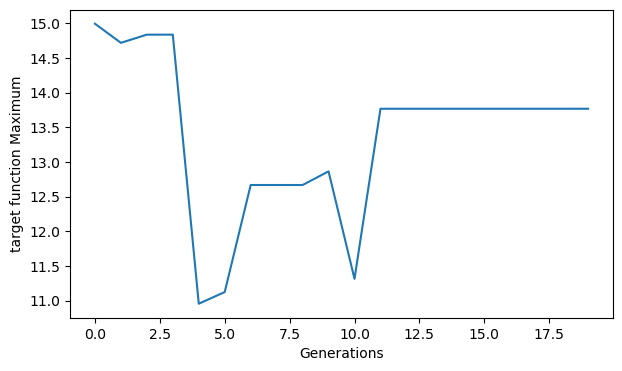

In [11]:
max_values = []
for i in range(20):
    max_values.append(np.nanmax(data_gens[i]['y_abs']))

fig, ax = plt.subplots(figsize = (7,4))
ax.plot(np.arange(20), max_values)
ax.set_xlabel('Generations')
ax.set_ylabel('target function Maximum')

# plt.savefig('ThompsonPolicy_targetfuncmax_take2.png', dpi = 300)

In [6]:
import imageio

# Directory to store images
image_dir = 'ThompsonPolicyplots/'
video_filename = 'ThompsonPolicy_gtgenerationvideo.gif'
bins = np.arange(7, 19, 0.75)
# Create images from plots
for i in data_gens.keys():
    data = data_gens[i]
    plt.figure(figsize=(10, 6))
    plt.hist(y0_abs, bins = bins, color = 'red', alpha = 0.3)
    plt.hist(data['y_abs'], bins=bins, color='blue', alpha=0.5)
    
    plt.xlim([5, 19])
    plt.ylim([0, 80])
    plt.xlabel('Curl')
    plt.ylabel('Counts')
    plt.title(f'Generation {i}')
    plt.grid(True)
    plt.savefig(f"{image_dir}plot_{i:03d}.png", dpi = 300)
    plt.close()

# Create a video from images
with imageio.get_writer(video_filename, mode='I', fps=3) as writer:
    for i in range(20):
        image = imageio.imread(f"{image_dir}plot_{i:03d}.png")
        
        writer.append_data(image)

print("Video creation complete.")

/tmp/ipykernel_1271839/1431395037.py:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f"{image_dir}plot_{i:03d}.png")


Video creation complete.


In [7]:
import imageio

# Directory to store images
image_dir = 'ThompsonPolicyplots/'
video_filename = 'ThompsonPolicy_predmeanvideo.gif'
bins = np.arange(0, 22, 1)
# Create images from plots
for i in data_gens.keys():
    data = data_gens[i]
    plt.figure(figsize=(10, 6))
    plt.hist(y0_abs, bins=bins, color='red', alpha=0.3)
    plt.hist(data['pred_mean'], bins=bins, color='blue', alpha=0.5)
    plt.xlim([5, 18])
    plt.ylim([0, 700])
    plt.xlabel('Curl')
    plt.ylabel('Counts')
    plt.title(f'Generation {i}')
    plt.grid(True)
    plt.savefig(f"{image_dir}fitnessplot_{i:03d}.png", dpi = 300)
    plt.close()

# Create a video from images
with imageio.get_writer(video_filename, mode='I', fps=3) as writer:
    for i in range(20):
        image = imageio.imread(f"{image_dir}fitnessplot_{i:03d}.png")
        
        writer.append_data(image)

print("Video creation complete.")

/tmp/ipykernel_1271839/1388200772.py:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f"{image_dir}fitnessplot_{i:03d}.png")


Video creation complete.
